In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 : Data preprocessing

In [2]:
df = pd.read_csv('penguins.csv')
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
df = df.dropna()
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Step2 : Data statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
df.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


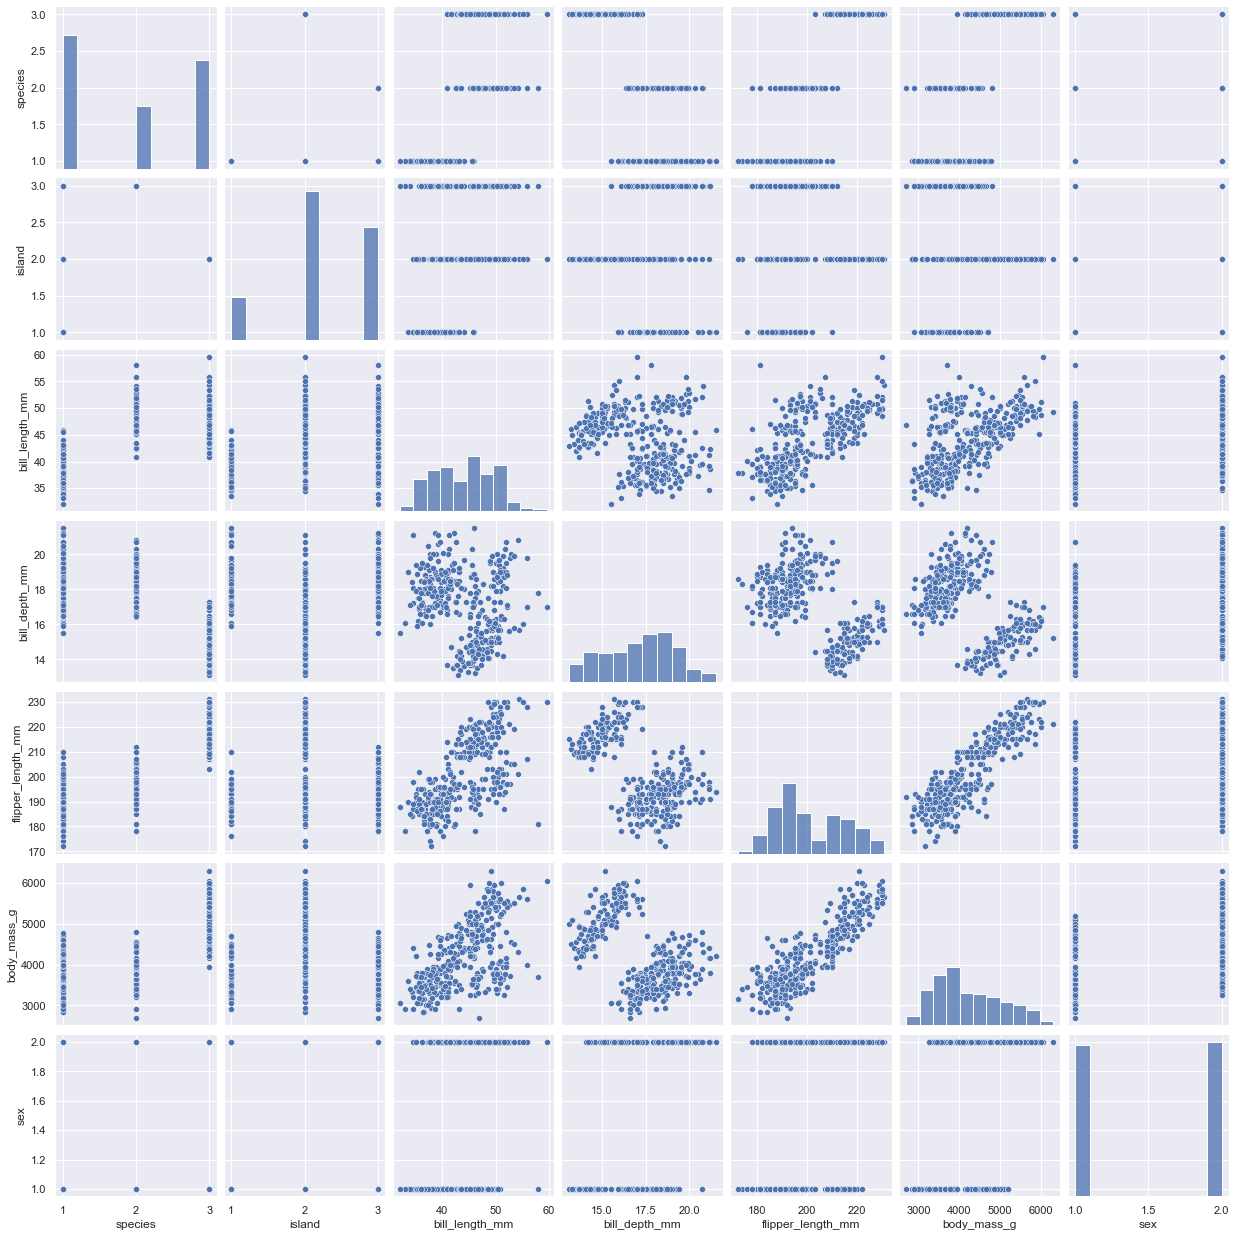

In [7]:
classLabel1 = {'Torgersen' : 1,'Biscoe' : 2, 'Dream' : 3}
classLabel2 = {'FEMALE' : 1, 'MALE' : 2}
classLabel3 = {'Adelie' :1, 'Chinstrap' :2, 'Gentoo' :3}
df['island'] = df['island'].map(classLabel1)
df['sex'] = df['sex'].map(classLabel2)
df['species'] = df['species'].map(classLabel3)
sns.set()
sns.pairplot(df)

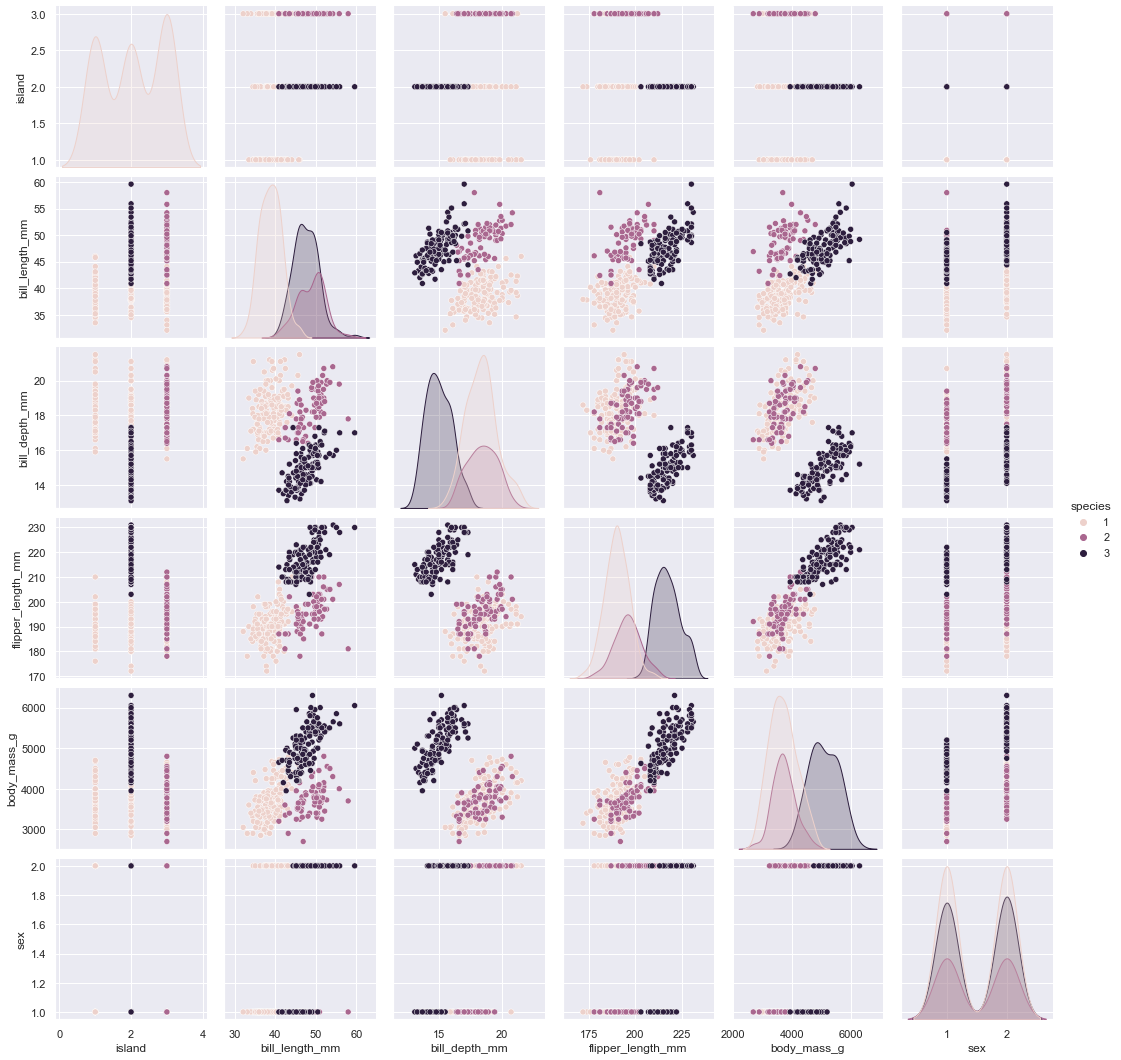

In [8]:
sns.pairplot(df, hue='species')

## Step 3 : Decision tree

In [9]:
from sklearn.model_selection import train_test_split
X = df[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]
y = df[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

The maximum depth is 3, and the least node size is 5:
Train Accuracy : 0.9718875502008032
Test  Accuracy : 0.9642857142857143
The maximum depth is 3, and the least node size is 10:
Train Accuracy : 0.9437751004016064
Test  Accuracy : 0.9523809523809523
The maximum depth is 3, and the least node size is 15:
Train Accuracy : 0.9437751004016064
Test  Accuracy : 0.9523809523809523
The maximum depth is 4, and the least node size is 5:
Train Accuracy : 0.9718875502008032
Test  Accuracy : 0.9642857142857143
The maximum depth is 4, and the least node size is 10:
Train Accuracy : 0.9437751004016064
Test  Accuracy : 0.9523809523809523
The maximum depth is 4, and the least node size is 15:
Train Accuracy : 0.9437751004016064
Test  Accuracy : 0.9523809523809523
The maximum depth is 5, and the least node size is 5:
Train Accuracy : 0.9718875502008032
Test  Accuracy : 0.9642857142857143
The maximum depth is 5, and the least node size is 10:
Train Accuracy : 0.9437751004016064
Test  Accuracy : 0.9523

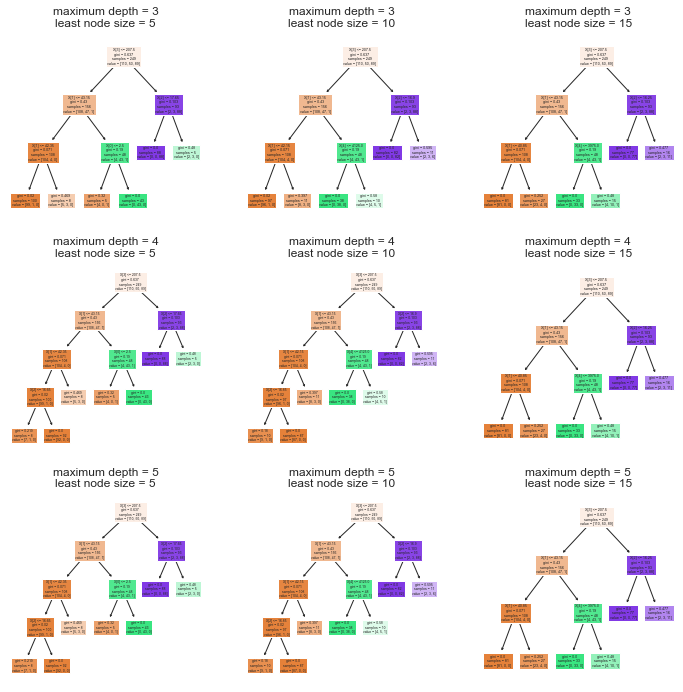

In [10]:
from sklearn import tree
max_depths = [3, 4, 5]
min_samples_leaves = [5, 10, 15]
listDT = []

for i in range(3):
    for j in range(3):
        DT = tree.DecisionTreeClassifier(random_state=0,max_depth=max_depths[i],min_samples_leaf=min_samples_leaves[j])
        DT.fit(X_train, y_train)
        listDT.append(DT)

for i in range(3):
    for j in range(3):
        print('The maximum depth is %d, and the least node size is %d:'%(max_depths[i], min_samples_leaves[j]))
        print('Train Accuracy :', listDT[3*i+j].score(X_train, y_train))
        print('Test  Accuracy :', listDT[3*i+j].score(X_test, y_test))
    
fig, axes = plt.subplots(3, 3,figsize=(12,12))
for i in range(3):
    for j in range(3):
        tree.plot_tree(listDT[3*i+j], filled = True, ax = axes[i][j])
        axes[i][j].set_title('maximum depth = %d\nleast node size = %d'%(max_depths[i], min_samples_leaves[j]))

## Step 4 : Bagging of trees

In [11]:
from sklearn.ensemble import BaggingClassifier
max_depths = [3, 4, 5]
num_trees = [4, 8, 12]
listBaggingDT = []

for i in range(3):
    for j in range(3):
        DT = tree.DecisionTreeClassifier(random_state=0,max_depth=max_depths[i])
        baggingDT = BaggingClassifier(base_estimator=DT,n_estimators=num_trees[j],random_state=0)
        baggingDT.fit(X_train, y_train.values.ravel())
        listBaggingDT.append(baggingDT)
        
for i in range(3):
    for j in range(3):
        print('The maximum depth is %d, and the number of trees is %d:'%(max_depths[i], num_trees[j]))
        print('Train Accuracy :', listBaggingDT[3*i+j].score(X_train, y_train))
        print('Test  Accuracy :', listBaggingDT[3*i+j].score(X_test, y_test))

The maximum depth is 3, and the number of trees is 4:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The maximum depth is 3, and the number of trees is 8:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The maximum depth is 3, and the number of trees is 12:
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9642857142857143
The maximum depth is 4, and the number of trees is 4:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The maximum depth is 4, and the number of trees is 8:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The maximum depth is 4, and the number of trees is 12:
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9642857142857143
The maximum depth is 5, and the number of trees is 4:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The maximum depth is 5, and the number of trees is 8:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857

## Step 5 : Random forests

In [12]:
from sklearn.ensemble import RandomForestClassifier
num_trees = [5, 10, 15]
num_attr = [3, 4, 5]
listRF = []

for i in range(3):
    for j in range(3):
        RF = RandomForestClassifier(n_estimators=num_trees[i],max_features=num_attr[j],random_state=0)
        RF.fit(X_train, y_train.values.ravel())
        listRF.append(RF)

for i in range(3):
    for j in range(3):
        print('The number of trees is %d, and the value of m is %d:'%(num_trees[i], num_attr[j]))
        print('Train Accuracy :', listRF[3*i+j].score(X_train, y_train))
        print('Test  Accuracy :', listRF[3*i+j].score(X_test, y_test))

The number of trees is 5, and the value of m is 3:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The number of trees is 5, and the value of m is 4:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The number of trees is 5, and the value of m is 5:
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9642857142857143
The number of trees is 10, and the value of m is 3:
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9761904761904762
The number of trees is 10, and the value of m is 4:
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9642857142857143
The number of trees is 10, and the value of m is 5:
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9642857142857143
The number of trees is 15, and the value of m is 3:
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9761904761904762
The number of trees is 15, and the value of m is 4:
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9761904761904762
The number 

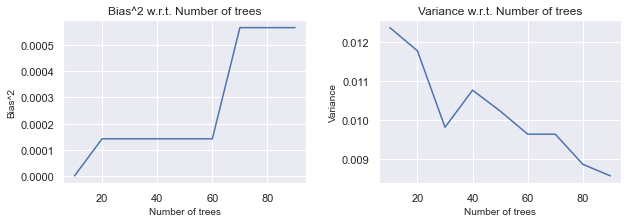

In [13]:
from mlxtend.evaluate import bias_variance_decomp

num_trees = list(range(10, 100, 10))
bias = []
variance = []

for n in num_trees:
    RF = RandomForestClassifier(n_estimators=n,random_state=0)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(RF, X_train.values, y_train.values.ravel(), X_test.values, y_test.values.ravel(), loss='0-1_loss',random_seed=0)
    bias.append(avg_bias**2)
    variance.append(avg_var)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,3))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
ax1.set_title('Bias^2 w.r.t. Number of trees',fontsize=12)
ax2.set_title('Variance w.r.t. Number of trees',fontsize=12)
ax1.set_xlabel('Number of trees',fontsize=10)
ax2.set_xlabel('Number of trees',fontsize=10)
ax1.set_ylabel('Bias^2',fontsize=10)
ax2.set_ylabel('Variance',fontsize=10)
ax1.plot(num_trees, bias)
ax2.plot(num_trees, variance)